In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_bmyrc_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Myrcene
0,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.484375
3,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.484375
4,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74996,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Beta-Myrcene'], axis = 1)
y = df_rf[['X..Beta-Myrcene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.484375 ],
       [0.484375 ],
       [0.484375 ],
       ...,
       [0.2734375],
       [0.2734375],
       [0.2734375]])

<Axes: ylabel='Count'>

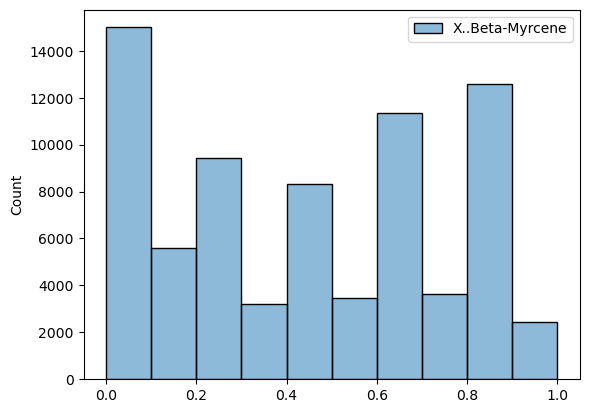

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1566/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.049026450396893996

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.008870580450725493

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09418375895410787

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9792067375650778

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.8967886939094368

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.122075
1,lsa_1,0.125762
2,lsa_2,0.117840
3,lsa_3,0.110320
4,lsa_4,0.115393
...,...,...
81,tree,0.003125
82,tropical,0.002533
83,vanilla,0.002263
84,violet,0.000755


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
1,lsa_1,1.257625e-01
0,lsa_0,1.220754e-01
2,lsa_2,1.178404e-01
4,lsa_4,1.153930e-01
3,lsa_3,1.103204e-01
7,sativa,3.188549e-02
62,mint,1.871720e-02
50,diesel,1.599132e-02
43,blueberry,1.530408e-02
30,relaxed,1.472874e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.21935809e-01, 1.24837427e-01, 1.16994885e-01, 1.12502566e-01,
       1.14871121e-01, 1.30522350e-03, 1.37969800e-02, 3.18357053e-02,
       6.66290964e-05, 2.53398646e-03, 5.28938280e-03, 9.45063262e-13,
       1.10839952e-02, 9.14393154e-05, 4.24685692e-03, 6.58297234e-03,
       8.97029535e-03, 8.11523767e-03, 2.07261989e-06, 1.14494068e-02,
       6.95221028e-07, 1.55336530e-06, 9.16883949e-03, 6.50179741e-03,
       1.31518239e-02, 3.22855686e-03, 9.20594118e-03, 6.94472282e-05,
       1.13031141e-06, 3.14795986e-03, 1.44307975e-02, 2.92675025e-07,
       1.30744198e-02, 0.00000000e+00, 0.00000000e+00, 9.25376781e-03,
       8.20414261e-03, 9.29665493e-03, 6.32812858e-04, 7.63797629e-04,
       8.56800800e-05, 6.85484394e-03, 2.82221941e-04, 1.51426291e-02,
       5.24543694e-04, 9.89335559e-03, 2.29197538e-03, 5.29616308e-04,
       7.77002380e-03, 3.69993412e-03, 1.57116687e-02, 1.16013041e-02,
       4.73649702e-03, 5.00995266e-03, 4.63388993e-03, 4.45455922e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,sativa,happy,relaxed,sleepy,blueberry,diesel,mint,sweet
0,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,1,0,0,0,0,0
2,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,1,0,0,0,0,0
3,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,1,0,0,0,0,0
4,0.356758,-0.100188,-0.099331,-0.001421,0.006253,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0,0,0,0
74996,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,1,1,1,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,1,1,1,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_bmyrc.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_bmyrc.pkl")

['selected_X_rf_lsa_elbow_bmyrc.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1566/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05094851798520779

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.009472265924248735

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09732556665259512

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9715015947331608

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.8897956413188949

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_bmyrc.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_bmyrc.pkl")

['rscv_rf_lsa_elbow_best_params_bmyrc.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1566/2143269374.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.05013378939099909

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.008849496709177283

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09407176361255955

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9724419544546012

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.8970412024657362

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_bmyrc.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_bmyrc.pkl")

['y_test_rfreg_lsa_elbow_bmyrc.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.049986041654311614

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.008463379047699676

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.09199662519733903

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9003704451860198

Error analysis

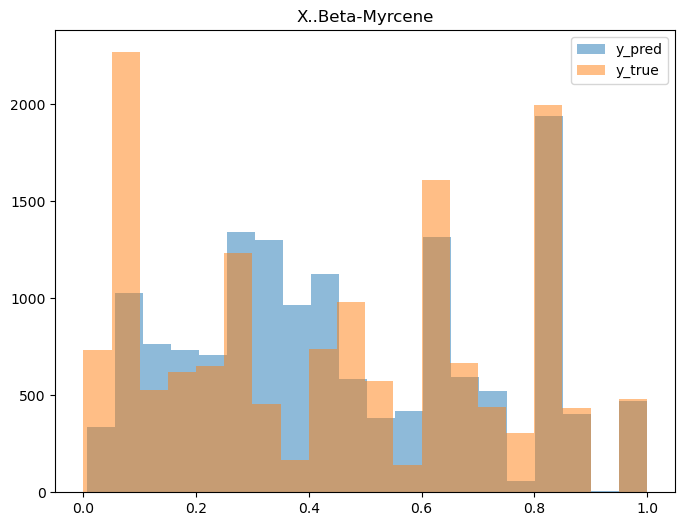

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Myrcene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_bmyrc.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.952
P-value: 0.000


<Axes: >

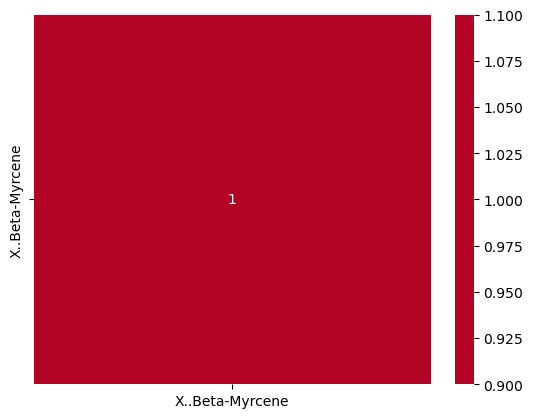

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)